In [1]:
import pandas as pd

In [5]:
# Load the dataset
df = pd.read_csv('Latur Precipitation Data.csv')
df.head()

,YEAR,DOY,PRECIPITATION,T_MAX,T_MIN
0,1985,1,0.11,31.78,18.98
1,1985,2,0.13,29.53,18.11
2,1985,3,0.02,30.77,16.70
3,1985,4,0.00,32.05,17.38
4,1985,5,0.00,32.24,18.72


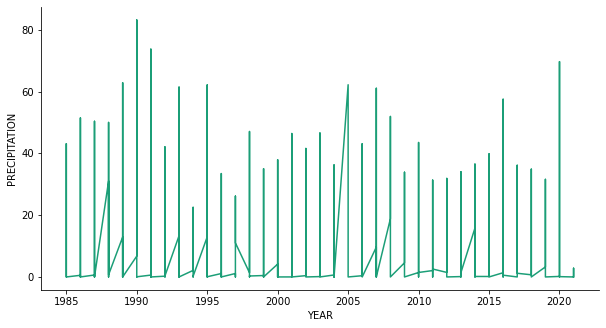

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index=0):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['YEAR']
    ys = series['PRECIPITATION']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2))  # Remove the layout parameter
df_sorted = data.sort_values('YEAR', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('YEAR')
_ = plt.ylabel('PRECIPITATION')

In [11]:
import pandas as pd

# Assuming you already have your data in a DataFrame called df
# Create a new DataFrame to store the converted data
new_df = pd.DataFrame()
new_df['Year'] = df['YEAR']
new_df['Prec'] = df['PRECIPITATION']

# Display the new DataFrame
print(new_df)
new_df.describe()

       Year  Prec
0      1985  0.11
1      1985  0.13
2      1985  0.02
3      1985  0.00
4      1985  0.00
...     ...   ...
13234  2021  0.00
13235  2021  0.00
13236  2021  0.00
13237  2021  0.00
13238  2021  0.00

[13239 rows x 2 columns]


,Year,Prec
count,13239.000000,13239.000000
mean,2002.626785,2.052456
std,10.464347,5.499415
min,1985.000000,0.000000
25%,1994.000000,0.000000
50%,2003.000000,0.010000
75%,2012.000000,1.220000
max,2021.000000,83.210000


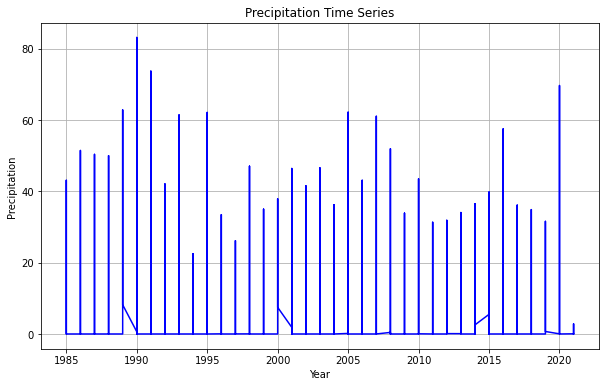

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already created the new DataFrame new_df


new_df.set_index('Year', inplace=True)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Prec'], color='b', linestyle='-')
plt.title('Precipitation Time Series')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.grid(True)
plt.show()


Number of data points greater than the threshold: 27.693399999999926


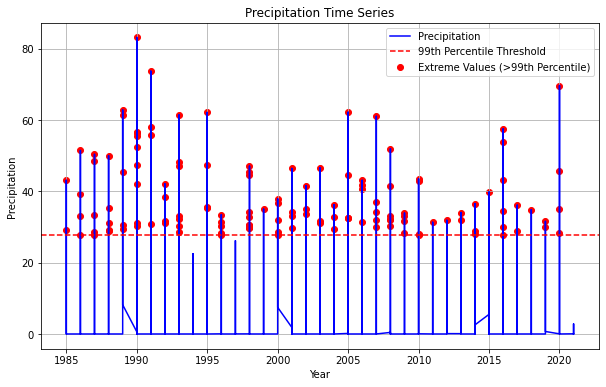

In [14]:
import matplotlib.pyplot as plt

# Calculate the 95th percentile threshold
threshold = new_df['Prec'].quantile(0.99)

count_above_threshold = threshold.sum()

# Print the count
print("Number of data points greater than the threshold:", count_above_threshold)

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(new_df.index, new_df['Prec'], color='b', linestyle='-', label='Precipitation')
plt.axhline(y=threshold, color='r', linestyle='--', label='99th Percentile Threshold')

# Highlight extreme values above the threshold
extreme_values = new_df[new_df['Prec'] > threshold]
plt.scatter(extreme_values.index, extreme_values['Prec'], color='red', label='Extreme Values (>99th Percentile)')

plt.title('Precipitation Time Series')
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.show()


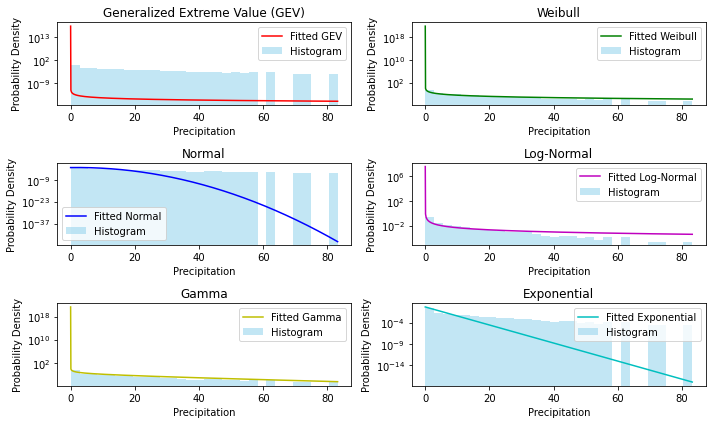

In [33]:
import numpy as np
from scipy.stats import genextreme, weibull_min, norm, lognorm, gamma, expon, gaussian_kde
import matplotlib.pyplot as plt

# Assuming new_df is your DataFrame with the precipitation data

# Extract the precipitation values
data = new_df['Prec'].values

# Fit the Generalized Extreme Value (GEV) distribution
params_gev = genextreme.fit(data)

# Fit the Weibull distribution
params_weibull = weibull_min.fit(data)

# Fit the Normal distribution
params_normal = norm.fit(data)

# Fit the Log-Normal distribution
params_lognormal = lognorm.fit(data)

# Fit the Gamma distribution
params_gamma = gamma.fit(data)

# Fit the Exponential distribution
params_exponential = expon.fit(data)

# Fit the Kernel Density Estimation (KDE)
kde = gaussian_kde(data)

# Generate values from the fitted distributions
x = np.linspace(min(data), max(data), 1000)
y_gev = genextreme.pdf(x, *params_gev)
y_weibull = weibull_min.pdf(x, *params_weibull)
y_normal = norm.pdf(x, *params_normal)
y_lognormal = lognorm.pdf(x, *params_lognormal)
y_gamma = gamma.pdf(x, *params_gamma)
y_exponential = expon.pdf(x, *params_exponential)
y_kde = kde(x)

# Plot each fitted distribution separately
plt.figure(figsize=(10, 6))

plt.subplot(3, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_gev, color='r', linestyle='-', label='Fitted GEV')
plt.title('Generalized Extreme Value (GEV)')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.subplot(3, 2, 2)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_weibull, color='g', linestyle='-', label='Fitted Weibull')
plt.title('Weibull')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.subplot(3, 2, 3)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_normal, color='b', linestyle='-', label='Fitted Normal')
plt.title('Normal')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.subplot(3, 2, 4)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_lognormal, color='m', linestyle='-', label='Fitted Log-Normal')
plt.title('Log-Normal')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.subplot(3, 2, 5)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_gamma, color='y', linestyle='-', label='Fitted Gamma')
plt.title('Gamma')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.subplot(3, 2, 6)
plt.hist(data, bins=30, density=True, alpha=0.5, color='skyblue', label='Histogram')
plt.plot(x, y_exponential, color='c', linestyle='-', label='Fitted Exponential')
plt.title('Exponential')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()


In [34]:
from scipy.stats import genextreme, weibull_min, norm, lognorm, gamma, expon
from scipy import stats
import numpy as np

# Fit the distributions
distributions = {
    'GEV': genextreme,
    'Weibull': weibull_min,
    'Normal': norm,
    'Log-Normal': lognorm,
    'Gamma': gamma,
    'Exponential': expon
}

# Calculate AIC and BIC for each distribution
aic_scores = {}
bic_scores = {}
for name, dist in distributions.items():
    params = dist.fit(data)
    llf = -dist(*params).logpdf(data).sum()
    aic = 2 * len(params) - 2 * llf
    bic = np.log(len(data)) * len(params) - 2 * llf
    aic_scores[name] = aic
    bic_scores[name] = bic

# Print the results
print("Akaike Information Criterion (AIC):")
for name, aic in aic_scores.items():
    print(f"{name}: {aic}")

print("\nBayesian Information Criterion (BIC):")
for name, bic in bic_scores.items():
    print(f"{name}: {bic}")


Akaike Information Criterion (AIC):
GEV: 99034.71067464023
Weibull: 613046.207512985
Normal: -82701.15959554596
Log-Normal: 187112.29790961725
Gamma: 604960.1549801225
Exponential: -45512.6698793964

Bayesian Information Criterion (BIC):
GEV: 99057.18344153404
Weibull: 613068.6802798788
Normal: -82686.17775095008
Log-Normal: 187134.77067651105
Gamma: 604982.6277470163
Exponential: -45497.68803480053


In [35]:
# Find the distribution with the lowest AIC and BIC values
best_aic = min(aic_scores, key=aic_scores.get)
best_bic = min(bic_scores, key=bic_scores.get)

# Print the most fitted distribution based on AIC and BIC
print("Most fitted distribution based on AIC:", best_aic)
print("Most fitted distribution based on BIC:", best_bic)

Most fitted distribution based on AIC: Normal
Most fitted distribution based on BIC: Normal


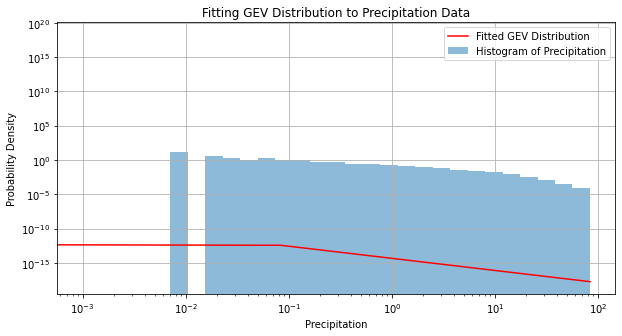

In [32]:
import matplotlib.pyplot as plt
from scipy.stats import genextreme
import numpy as np



# Fit the GEV distribution
params_gev = genextreme.fit(data)

# Generate values from the fitted GEV distribution
x_gev = np.linspace(min(data), max(data), 1000)
y_gev = genextreme.pdf(x_gev, *params_gev)

# Plot the histogram of data
plt.figure(figsize=(10, 5))
plt.hist(data, bins=np.logspace(np.log10(0.001), np.log10(max(data)), 30), density=True, alpha=0.5, label='Histogram of Precipitation')
plt.xscale('log')  # Using a logarithmic scale for x-axis
plt.yscale('log')  # Using a logarithmic scale for y-axis

# Plot the fitted GEV distribution
plt.plot(x_gev, y_gev, color='r', linestyle='-', label='Fitted GEV Distribution')

plt.title('Fitting GEV Distribution to Precipitation Data')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


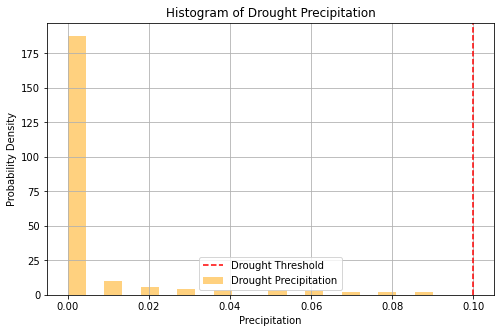

In [42]:
# Set a manual threshold for drought (you can adjust this value as needed)
drought_threshold = 0.1  # for example, 0.1 inches

# Filter the precipitation values below the drought threshold
drought_values = data[data < drought_threshold]

# Plot the histogram of drought values
plt.figure(figsize=(8, 5))
plt.hist(drought_values, bins=20, density=True, alpha=0.5, color='orange', label='Drought Precipitation')
plt.axvline(x=drought_threshold, color='red', linestyle='--', label='Drought Threshold')
plt.title('Histogram of Drought Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()
